<a href="https://colab.research.google.com/github/venkatanagaakshita/Analysis-and-Prediction-of-Reopened-Questions-in-Stack-Overflow./blob/main/project5800.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,  plot_confusion_matrix, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, r2_score
from sklearn import tree
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
import pandas as pd

rd = pd.read_csv("/content/drive/MyDrive/reopened_dataset.csv")

print(len(rd))



32561


In [2]:
cd = pd.read_csv("/content/drive/MyDrive/closed_dataset.csv")
cd.head()
print(len(cd))

536934


In [3]:
allIds = list(set(list(rd.post_id)))
print(len(allIds))

31641


In [6]:
cd = cd[~cd['post_id'].isin(allIds)] #To get closed questions which were never reopened
cd = cd[:31641]

In [7]:
print(len(cd))
cd.head()

31641


,post_id,post_history_type_id,creation_date,body,comment_count,answer_count,last_activity_date,tags,owner_user_id,favorite_count,score,view_count
0,333271,10,2012-07-26 22:57:24.717 UTC,<p>Having recently come across <a href= http:/...,0,6,2014-12-14 15:22:36.97 UTC,factor-lang,38803.0,18.0,26,3466
1,165404,10,2012-07-19 15:08:37.483 UTC,<p>I'm looking for some good references for le...,5,8,2011-04-22 08:29:25.06 UTC,c#|f#|2d|physics,16942.0,42.0,42,11636
2,28633062,10,2015-02-20 16:08:35.877 UTC,<p>Not able to compile and it is showing <stro...,0,1,2015-02-20 15:56:40.373 UTC,java,3191934.0,NaN,-5,51
3,13427847,10,2013-01-28 19:11:53.517 UTC,<p>Example: -</p> <pre><code>$arrayName = arra...,2,1,2012-11-17 05:15:25.463 UTC,php,NaN,NaN,1,81
4,4307305,10,2010-11-30 15:58:07.497 UTC,<blockquote> <p><strong>Possible Duplicate:</s...,1,1,2010-11-29 19:39:47.513 UTC,asp.net|asp.net-mvc|iis|file-upload,NaN,NaN,0,2351


In [8]:
def getDomainsOfExternalLinks(totalTags):
    domainDict = {}
    for i in totalTags:
        if i in domainDict.keys(): 
          existingCount = domainDict[i] + 1
          domainDict.update({i:existingCount})
        else:
          domainDict[i] = 1
    return domainDict

In [9]:
import matplotlib.pyplot as plt
totalTags = []
for i in cd.tags:
    totalTags.append(i)

print(len(totalTags))

domainDict = getDomainsOfExternalLinks(totalTags)

top20Domains = dict(sorted(domainDict.items(), key = lambda item: item[1], reverse=True)[:20])

#Bar graph of top 20 domains in external links
keys1 = top20Domains.keys()
values1 = top20Domains.values()

31641


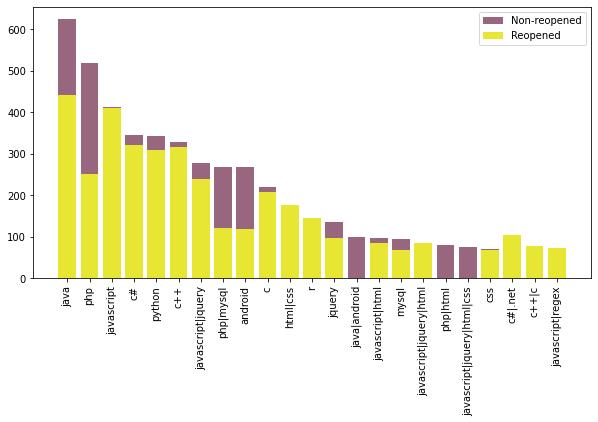

In [11]:
import matplotlib.pyplot as plt
totalTags = []
for i in rd.tags:
    totalTags.append(i)



domainDict = getDomainsOfExternalLinks(totalTags)

top20Domains = dict(sorted(domainDict.items(), key = lambda item: item[1], reverse=True)[:20])

#Bar graph of top 20 domains in external links
keys2 = top20Domains.keys()
values2 = top20Domains.values()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(keys1, values1, color = (0.6,0.4,0.5), label = 'Non-reopened')
plt.bar(keys2, values2, color = (0.9,0.9,0.2), label = 'Reopened')
plt.legend()
plt.savefig('FIG 1.pdf', dpi=500)

In [12]:
def getCreationDates(totalCdates):
    domainDict = {}
    for i in totalCdates:
        if i in domainDict.keys(): 
          existingCount = domainDict[i] + 1
          domainDict.update({i:existingCount})
        else:
          domainDict[i] = 1
    return domainDict

In [13]:
from datetime import datetime
totalCdates = []

for i in cd.creation_date:
  temp = datetime.strptime(i[0:10], "%Y-%m-%d")
  totalCdates.append(temp.year)


from datetime import datetime
totalRdates = []

for i in rd.creation_date:
  temp = datetime.strptime(i[0:10], "%Y-%m-%d")
  totalRdates.append(temp.year)


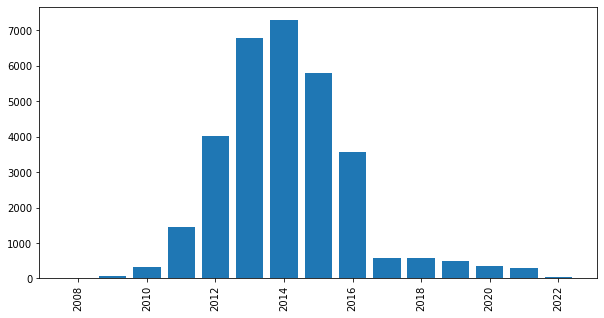

In [14]:
domainDict = getCreationDates(totalCdates)

top20Y = dict(sorted(domainDict.items(), key = lambda item: item[1], reverse=True)[:20])

#Bar graph of top 20 Years in Creation dates
keys = top20Y.keys()
values = top20Y.values()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(keys, values)
plt.savefig('FIG 2.pdf', dpi=500)

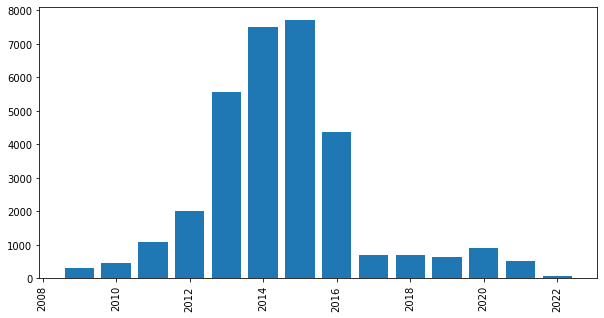

In [15]:
domainDict = getCreationDates(totalRdates)

top20Y = dict(sorted(domainDict.items(), key = lambda item: item[1], reverse=True)[:20])

#Bar graph of top 20 Years in Creation dates
keys = top20Y.keys()
values = top20Y.values()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(keys, values)
plt.savefig('FIG 3.pdf', dpi=500)

In [16]:
import collections
totalAnswercount1 = []
dict_logic = {}
sum = 0
for index in cd.index:
  temp1 = cd['creation_date'][index]
  
  temp = datetime.strptime(temp1[0:10], "%Y-%m-%d")
  if temp.year in dict_logic:
    sum = dict_logic.get(temp.year) + cd['answer_count'][index]
    d1 = {temp.year: sum}
    dict_logic.update(d1)
  else:
    dict_logic[temp.year] = cd['answer_count'][index]
od1 = collections.OrderedDict(sorted(dict_logic.items()))
print((od1))


OrderedDict([(2008, 31), (2009, 256), (2010, 936), (2011, 3665), (2012, 9286), (2013, 13825), (2014, 13032), (2015, 8739), (2016, 5640), (2017, 1723), (2018, 1594), (2019, 1431), (2020, 988), (2021, 893), (2022, 160)])


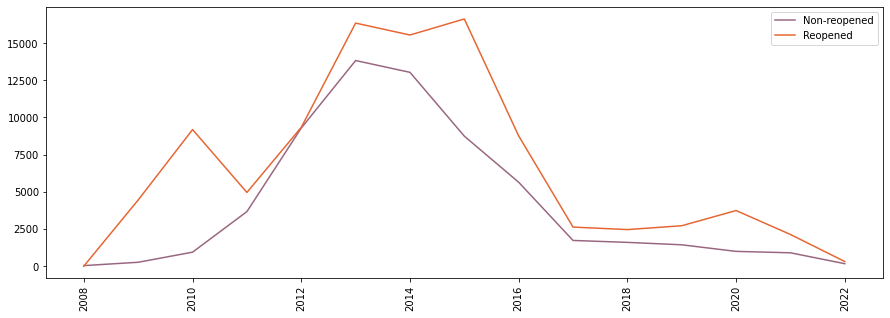

In [17]:
totalAnswercount2 = []
dict_logic = {}
sum = 0
for index in rd.index:
  temp1 = rd['creation_date'][index]
  
  temp = datetime.strptime(temp1[0:10], "%Y-%m-%d")
  if temp.year in dict_logic:
    sum = dict_logic.get(temp.year) + rd['answer_count'][index]
    d1 = {temp.year: sum}
    dict_logic.update(d1)
  else:
    dict_logic[temp.year] = rd['answer_count'][index]
dict_logic[2008] = 0
od2 = collections.OrderedDict(sorted(dict_logic.items()))



keys = list(od1.keys())


plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
plt.plot(keys, list(od1.values()), color = (0.6,0.4,0.5), label = 'Non-reopened')
plt.plot(keys, list(od2.values()), color = (0.9,0.4,0.2), label = 'Reopened')
plt.legend()
plt.savefig('FIG 4.pdf', dpi=500)


In [18]:
totalCommentcount1 = []

dict_logic = {}
sum = 0
for index in cd.index:
  temp1 = cd['creation_date'][index]
  
  temp = datetime.strptime(temp1[0:10], "%Y-%m-%d")
  if temp.year in dict_logic:
    sum = dict_logic.get(temp.year) + cd['comment_count'][index]
    d1 = {temp.year: sum}
    dict_logic.update(d1)
  else:
    dict_logic[temp.year] = cd['comment_count'][index]
od1 = collections.OrderedDict(sorted(dict_logic.items()))
print((od1))

OrderedDict([(2008, 21), (2009, 150), (2010, 1028), (2011, 3708), (2012, 10683), (2013, 19629), (2014, 21115), (2015, 16411), (2016, 10595), (2017, 1028), (2018, 950), (2019, 845), (2020, 656), (2021, 626), (2022, 101)])


OrderedDict([(2008, 0), (2009, 2765), (2010, 4213), (2011, 6304), (2012, 9493), (2013, 27439), (2014, 37807), (2015, 39962), (2016, 20838), (2017, 2110), (2018, 1931), (2019, 1927), (2020, 2593), (2021, 1581), (2022, 227)])


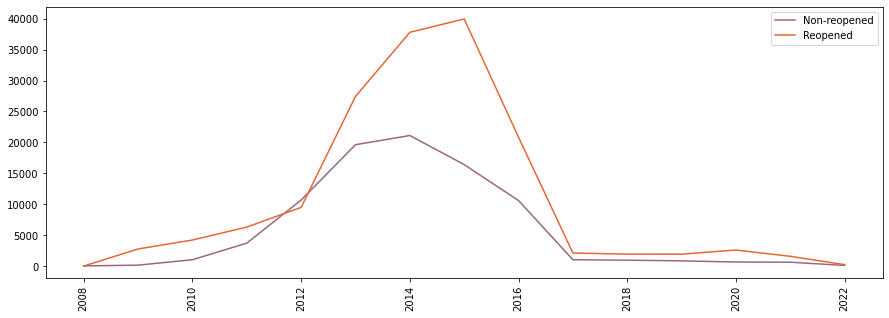

In [19]:
totalCommentcount2 = []

dict_logic = {}
sum = 0
for index in rd.index:
  temp1 = rd['creation_date'][index]
  
  temp = datetime.strptime(temp1[0:10], "%Y-%m-%d")
  if temp.year in dict_logic:
    sum = dict_logic.get(temp.year) + rd['comment_count'][index]
    d1 = {temp.year: sum}
    dict_logic.update(d1)
  else:
    dict_logic[temp.year] = rd['comment_count'][index]
dict_logic[2008] = 0    
od2 = collections.OrderedDict(sorted(dict_logic.items()))

print(od2)

keys = list(od1.keys())


plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
plt.plot(keys, list(od1.values()), color = (0.6,0.4,0.5), label = 'Non-reopened')
plt.plot(keys, list(od2.values()), color = (0.9,0.4,0.2), label = 'Reopened')
plt.legend()
plt.savefig('FIG 5.pdf', dpi=500)

In [20]:
totalScorecount1 = []

dict_logic = {}
sum = 0
for index in cd.index:
  temp1 = cd['creation_date'][index]
  
  temp = datetime.strptime(temp1[0:10], "%Y-%m-%d")
  if temp.year in dict_logic:
    sum = dict_logic.get(temp.year) + cd['score'][index]
    d1 = {temp.year: sum}
    dict_logic.update(d1)
  else:
    dict_logic[temp.year] = cd['score'][index]
od1 = collections.OrderedDict(sorted(dict_logic.items()))
print((od1))

OrderedDict([(2008, 22), (2009, 310), (2010, 1204), (2011, 4240), (2012, 9667), (2013, 11903), (2014, 5496), (2015, 4053), (2016, 5112), (2017, 4900), (2018, 4086), (2019, 4013), (2020, 2751), (2021, 2278), (2022, 435)])


OrderedDict([(2008, 0), (2009, 11339), (2010, 35759), (2011, 37528), (2012, 121334), (2013, 192300), (2014, 106267), (2015, 83620), (2016, 55303), (2017, 25263), (2018, 33963), (2019, 34814), (2020, 50446), (2021, 21983), (2022, 2853)])


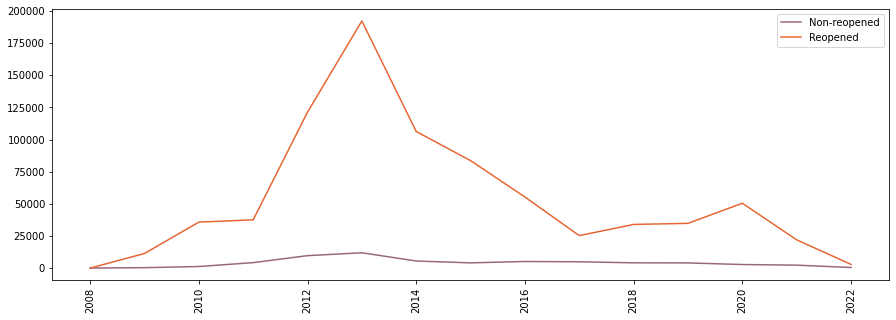

In [21]:
totalScorecount2 = []

dict_logic = {}
sum = 0
for index in rd.index:
  temp1 = rd['creation_date'][index]
  
  temp = datetime.strptime(temp1[0:10], "%Y-%m-%d")
  if temp.year in dict_logic:
    sum = dict_logic.get(temp.year) + rd['score'][index]
    d1 = {temp.year: sum}
    dict_logic.update(d1)
  else:
    dict_logic[temp.year] = rd['score'][index]
dict_logic[2008] = 0    
od2 = collections.OrderedDict(sorted(dict_logic.items()))

print(od2)

keys = list(od1.keys())


plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
plt.plot(keys, list(od1.values()), color = (0.6,0.4,0.5), label = 'Non-reopened')
plt.plot(keys, list(od2.values()), color = (0.9,0.4,0.2), label = 'Reopened')
plt.legend()
plt.savefig('FIG 5.pdf', dpi=500)

In [22]:
import nltk

In [23]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [25]:
cd.body[101]

'<p>Can you provide me good tutorial about CodeIgniter and PDO? Is it good to use CodeIgniter framework with PDO? What are the pros and cons using PDO with CodeIgniter?</p>'

In [26]:
 
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(cd.body[101])

{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.7461}

In [27]:
comments = cd.body
print(comments)


0        <p>Having recently come across <a href= http:/...
1        <p>I'm looking for some good references for le...
2        <p>Not able to compile and it is showing <stro...
3        <p>Example: -</p> <pre><code>$arrayName = arra...
4        <blockquote> <p><strong>Possible Duplicate:</s...
                               ...                        
33874    <pre><code>class HelloWorld { static int num1 ...
33875    <p>I have made the code and there's no error b...
33876    <p>Wrong question to ask so removing it. Pleas...
33877    <p>I want to validate the phone number Like <c...
33878    <p>A better way to explain my question is like...
Name: body, Length: 31641, dtype: object


In [28]:
comments = rd.body
# Initializing a dictionary to keep tally of results
c=0
for comments in comments:
    score = analyzer.polarity_scores(comments)
    if score['neu'] > 0.8 :
      c = c + 1       
print(c)  




31082


In [29]:
print(score['neg'])

0.0


In [30]:
comments = cd.body
# Initializing a dictionary to keep tally of results
c=0
for comments in comments:
    score = analyzer.polarity_scores(comments)
    if score['neu'] > 0.8 :
      c = c + 1       
print(c)  


29409


In [31]:
cd1 = cd.body
def format_data(cd1):

  last_col = str(data.columns[3])
  first_col = str(data.columns[0])

  data.rename(columns = {last_col: 'body', first_col: 'polarity'}, inplace=True) 

  # Change 0, 2, 4 to negative, neutral and positive
  labels = {0: 'negative', 2: 'neutral', 4: 'positive'}
  data['polarity'] = data['polarity'].map(labels)

  # Get only the two columns
  return data[['body', 'polarity']]


In [ ]:
cd1.head

<bound method NDFrame.head of 0        <p>Having recently come across <a href= http:/...
1        <p>I'm looking for some good references for le...
2        <p>Not able to compile and it is showing <stro...
3        <p>Example: -</p> <pre><code>$arrayName = arra...
4        <blockquote> <p><strong>Possible Duplicate:</s...
                               ...                        
34869    <p>Now my MYSQL query is below.</p> <p>But in ...
34870    <p>Is there a nicer way to compare the length ...
34871    <p>Why if I use this function two times in the...
34872    <p>I have 2 code snippets.</p> <p>Here is snip...
34873    <p>I am trying to set up an array of string th...
Name: body, Length: 32561, dtype: object>

In [33]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   post_id               32561 non-null  int64  
 1   post_history_type_id  32561 non-null  int64  
 2   creation_date         32561 non-null  object 
 3   body                  32561 non-null  object 
 4   comment_count         32561 non-null  int64  
 5   answer_count          32561 non-null  int64  
 6   last_activity_date    32561 non-null  object 
 7   tags                  32560 non-null  object 
 8   owner_user_id         32145 non-null  float64
 9   favorite_count        13781 non-null  float64
 10  score                 32561 non-null  int64  
 11  view_count            32561 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 3.0+ MB


In [34]:
rd.head(10)

,post_id,post_history_type_id,creation_date,body,comment_count,answer_count,last_activity_date,tags,owner_user_id,favorite_count,score,view_count
0,421225,11,2014-11-26 21:04:01.643 UTC,<p>I'm try to install the SQLite gem on a Fedo...,3,12,2016-05-12 12:33:46.633 UTC,ruby-on-rails|ruby|sqlite|gem,27515.0,19.0,48,45940
1,26563506,11,2014-10-25 14:40:03.703 UTC,<pre><code>#include &lt;unistd.h&gt; #include ...,8,4,2015-11-20 12:22:27.063 UTC,c|linux|fork,NaN,0.0,0,66
2,15207998,11,2013-03-05 01:50:03.973 UTC,<p>Do I need to pay for a license to be able t...,9,1,2014-01-28 00:50:26.37 UTC,windows-phone-7|windows-phone-8|blackberry,NaN,NaN,5,885
3,1173892,11,2011-09-20 01:15:53.393 UTC,<p>So I have this page with the html code and ...,5,2,2011-09-20 01:16:08.277 UTC,javascript|html|greasemonkey,NaN,NaN,-1,420
4,392397,11,2016-03-03 15:06:20.3 UTC,<p>As I was programming I haven't seen an inst...,1,3,2016-03-03 15:06:20.3 UTC,arrays|data-structures,48214.0,147.0,156,79780
5,23451115,11,2014-05-04 15:50:11.977 UTC,<p>I have some links that I would like to prev...,0,1,2014-05-04 15:50:11.977 UTC,html|css|html5|css3,3126477.0,NaN,-1,362
6,20975219,11,2014-01-07 16:44:42.933 UTC,<p>I would like to help me with an algorithmic...,1,1,2014-01-07 17:09:21.683 UTC,c++|search|binary,3169549.0,NaN,-1,377
7,29829102,11,2015-04-27 10:07:15.683 UTC,<p>I'm trying to insert data into a MySQL tabl...,2,1,2015-04-27 10:07:15.683 UTC,php|jquery|mysql|html5|sql-insert,4690774.0,NaN,0,202
8,23612317,11,2014-05-13 13:57:46.647 UTC,<p>To clarify: If a node doesn't exist how do ...,3,1,2014-05-14 19:46:38.707 UTC,c#|xml|linq|null|return,3325290.0,NaN,0,79
9,21143603,11,2014-01-15 17:25:16.437 UTC,<p>I am parsing files with consists of ascii c...,4,1,2014-01-15 17:53:03.75 UTC,python|unicode,1534898.0,NaN,0,74


In [36]:
input = pd.read_csv("/content/drive/MyDrive/reopened_dataset.csv")

In [39]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   post_id               32561 non-null  int64  
 1   post_history_type_id  32561 non-null  int64  
 2   creation_date         32561 non-null  object 
 3   body                  32561 non-null  object 
 4   comment_count         32561 non-null  int64  
 5   answer_count          32561 non-null  int64  
 6   last_activity_date    32561 non-null  object 
 7   tags                  32560 non-null  object 
 8   owner_user_id         32145 non-null  float64
 9   favorite_count        13781 non-null  float64
 10  score                 32561 non-null  int64  
 11  view_count            32561 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 3.0+ MB


In [40]:
input.head(10)

,post_id,post_history_type_id,creation_date,body,comment_count,answer_count,last_activity_date,tags,owner_user_id,favorite_count,score,view_count
0,421225,11,2014-11-26 21:04:01.643 UTC,<p>I'm try to install the SQLite gem on a Fedo...,3,12,2016-05-12 12:33:46.633 UTC,ruby-on-rails|ruby|sqlite|gem,27515.0,19.0,48,45940
1,26563506,11,2014-10-25 14:40:03.703 UTC,<pre><code>#include &lt;unistd.h&gt; #include ...,8,4,2015-11-20 12:22:27.063 UTC,c|linux|fork,NaN,0.0,0,66
2,15207998,11,2013-03-05 01:50:03.973 UTC,<p>Do I need to pay for a license to be able t...,9,1,2014-01-28 00:50:26.37 UTC,windows-phone-7|windows-phone-8|blackberry,NaN,NaN,5,885
3,1173892,11,2011-09-20 01:15:53.393 UTC,<p>So I have this page with the html code and ...,5,2,2011-09-20 01:16:08.277 UTC,javascript|html|greasemonkey,NaN,NaN,-1,420
4,392397,11,2016-03-03 15:06:20.3 UTC,<p>As I was programming I haven't seen an inst...,1,3,2016-03-03 15:06:20.3 UTC,arrays|data-structures,48214.0,147.0,156,79780
5,23451115,11,2014-05-04 15:50:11.977 UTC,<p>I have some links that I would like to prev...,0,1,2014-05-04 15:50:11.977 UTC,html|css|html5|css3,3126477.0,NaN,-1,362
6,20975219,11,2014-01-07 16:44:42.933 UTC,<p>I would like to help me with an algorithmic...,1,1,2014-01-07 17:09:21.683 UTC,c++|search|binary,3169549.0,NaN,-1,377
7,29829102,11,2015-04-27 10:07:15.683 UTC,<p>I'm trying to insert data into a MySQL tabl...,2,1,2015-04-27 10:07:15.683 UTC,php|jquery|mysql|html5|sql-insert,4690774.0,NaN,0,202
8,23612317,11,2014-05-13 13:57:46.647 UTC,<p>To clarify: If a node doesn't exist how do ...,3,1,2014-05-14 19:46:38.707 UTC,c#|xml|linq|null|return,3325290.0,NaN,0,79
9,21143603,11,2014-01-15 17:25:16.437 UTC,<p>I am parsing files with consists of ascii c...,4,1,2014-01-15 17:53:03.75 UTC,python|unicode,1534898.0,NaN,0,74
